### This is a experiment is to classify fashion-MNIST dataset with keras, using a Convolutional Neural Network (CNN) architecture. In just a few lines of code, you can define and train a model that is able to classify the images with over 93% accuracy, even without much optimization.

### Fashion-MNIST can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. It’s great for writing “hello world” tutorials for deep learning.

### Keras is popular and well-regarded high-level deep learning API. It’s built right into to TensorFlow — in addition to being an independent open source project. You can write all your usual great Keras programs as you normally would using this tf.keras, with the main change being just the imports. Using tf.keras enables you to take advantage of functionality like eager execution and tf.data — should you like to down the road. Here, I’ll cover basics.

### Label     	Description
### 0  	 -----       T-shirt/top
### 1	 -----       Trouser
### 2	 -----       Pullover
### 3	 -----       Dress
### 4	 -----       Coat
### 5	 -----       Sandal
### 6	 -----       Shirt
### 7	 -----       Sneaker
### 8	 -----       Bag
### 9	 -----       Ankle boot

### Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.


In [13]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import RMSprop
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import keras.callbacks as callbacks
import seaborn as sns

## load data

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Visualizing data

shape of image: (28, 28)


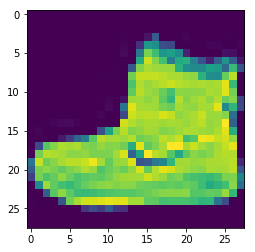

In [15]:
plt.imshow(X_train[0])
print('shape of image:',X_train[0].shape)

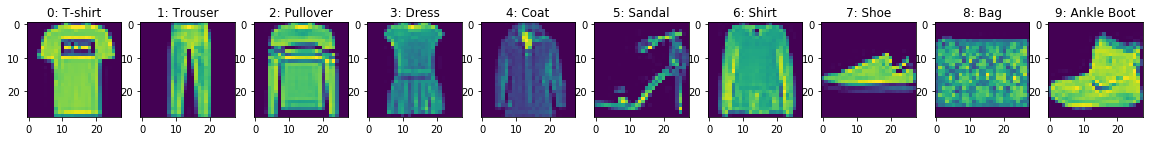

In [16]:
labelnames= ['T-shirt','Trouser','Pullover','Dress','Coat',\
             'Sandal', 'Shirt','Shoe','Bag', 'Ankle Boot']
fig = plt.figure(figsize=(20,200))
for i in np.unique(y_train):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[np.where(y_train==i)[0][0]])
    title = str(i)+': '+labelnames[i]
    plt.title(title)
plt.show()

#### Number of image per each category

Text(0,0.5,'image category index')

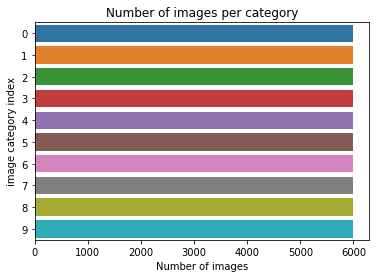

In [17]:
sns.barplot( np.bincount(y_train),np.unique(y_train),orient='h')
plt.title('Number of images per category')
plt.xlabel('Number of images')
plt.ylabel('image category index')

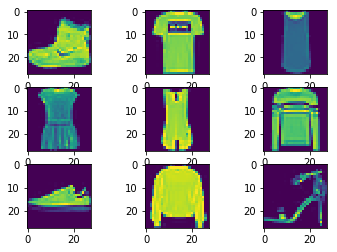

In [18]:
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

## Feature Engineering

In [19]:
# Adding and extra dimension
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [20]:
"""normalize inputs from 0-255 to 0.0-1.0 and one-hot encoding the labels"""
X_train = X_train / 255.0
X_test = X_test / 255.0
y_test= np_utils.to_categorical(y_test)
y_train= np_utils.to_categorical(y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


## Building the CNN model

In [21]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', input_shape = (28,28,1)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering = 'tf'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding = 'same',activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering = 'tf'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(metrics=['accuracy'], optimizer='rmsprop', loss = 'categorical_crossentropy')

C:\Users\s.prabhakar.daley\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  """
C:\Users\s.prabhakar.daley\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  if __name__ == '__main__':


## Calling TensorBoard

In [22]:
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)

In [ ]:
log_dir = './logs'
if not exists(log_dir):
    makedirs(log_dir)
tensorboard = TensorBoard(batch_size=1500,
                          embeddings_freq=1,
                          embeddings_layer_names=['features'],
                          embeddings_metadata='metadata.tsv',
                          embeddings_data=X_test)

## Training the model

In [23]:
callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train,y_train,
          batch_size=1500, epochs=80,
          callbacks=[tensorboard]
          validation_data=(X_test,y_test), 
          shuffle=True )

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 24s 393us/step - loss: 1.2432 - acc: 0.5266 - val_loss: 0.6479 - val_acc: 0.7692
Epoch 2/80
60000/60000 [==============================] - 20s 337us/step - loss: 0.6549 - acc: 0.7525 - val_loss: 0.5624 - val_acc: 0.7971
Epoch 3/80
60000/60000 [==============================] - 20s 329us/step - loss: 0.5298 - acc: 0.8070 - val_loss: 0.4391 - val_acc: 0.8376
Epoch 4/80
60000/60000 [==============================] - 20s 334us/step - loss: 0.4574 - acc: 0.8328 - val_loss: 0.4117 - val_acc: 0.8531
Epoch 5/80
60000/60000 [==============================] - 20s 331us/step - loss: 0.4050 - acc: 0.8535 - val_loss: 0.3546 - val_acc: 0.8704
Epoch 6/80
60000/60000 [==============================] - 20s 338us/step - loss: 0.3661 - acc: 0.8672 - val_loss: 0.3410 - val_acc: 0.8746
Epoch 7/80
60000/60000 [==============================] - 20s 338us/step - loss: 0.3443 - acc: 0.8732 - val_loss: 0.

60000/60000 [==============================] - 20s 333us/step - loss: 0.0803 - acc: 0.9697 - val_loss: 0.2866 - val_acc: 0.9290
Epoch 60/80
60000/60000 [==============================] - 20s 327us/step - loss: 0.0799 - acc: 0.9703 - val_loss: 0.2715 - val_acc: 0.9327
Epoch 61/80
60000/60000 [==============================] - 20s 326us/step - loss: 0.0759 - acc: 0.9712 - val_loss: 0.2660 - val_acc: 0.9308
Epoch 62/80
60000/60000 [==============================] - 20s 330us/step - loss: 0.0743 - acc: 0.9712 - val_loss: 0.2734 - val_acc: 0.9304
Epoch 63/80
60000/60000 [==============================] - 20s 328us/step - loss: 0.0785 - acc: 0.9704 - val_loss: 0.2651 - val_acc: 0.9326
Epoch 64/80
60000/60000 [==============================] - 20s 331us/step - loss: 0.0729 - acc: 0.9714 - val_loss: 0.2758 - val_acc: 0.9312
Epoch 65/80
60000/60000 [==============================] - 20s 335us/step - loss: 0.0725 - acc: 0.9725 - val_loss: 0.2787 - val_acc: 0.9308
Epoch 66/80
60000/60000 [=======

## Evaluating the Model

In [24]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 167us/step


[0.28592763239443303, 0.9331]